In [426]:
#Data Ingestion

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diamond Dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content

- **price:** Price in US dollars (\$326--\$18,823)
- **carat:** Weight of the diamond (0.2--5.01)
- **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** Diamond colour, from J (worst) to D (best)
- **clarity:** A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** Length in mm (0--10.74)
- **y:** Width in mm (0--58.9)
- **z:** Depth in mm (0--31.8)
- **depth:** Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** Width of top of diamond relative to widest point (43--95)

This dataset provides valuable insights into the characteristics and pricing of diamonds, making it suitable for various data analysis and visualization projects.


In [428]:
df=pd.read_csv('data\diamonds.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\soods\AppData\Local\Temp\ipykernel_5108\4221944928.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [429]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [430]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [431]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [432]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [434]:
df.duplicated().sum()

146

In [435]:
df.shape

(53940, 10)

In [436]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [437]:
catdf = df.select_dtypes(include="object")
numdf = df.select_dtypes(exclude="object")



In [438]:
catdf.describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [439]:
numdf.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [440]:
catdf['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [441]:
catdf['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [442]:
catdf['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [443]:
numdf['x'].value_counts()

x
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: count, Length: 554, dtype: int64

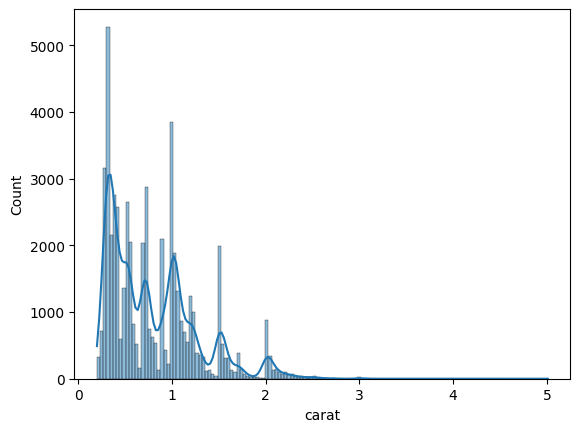

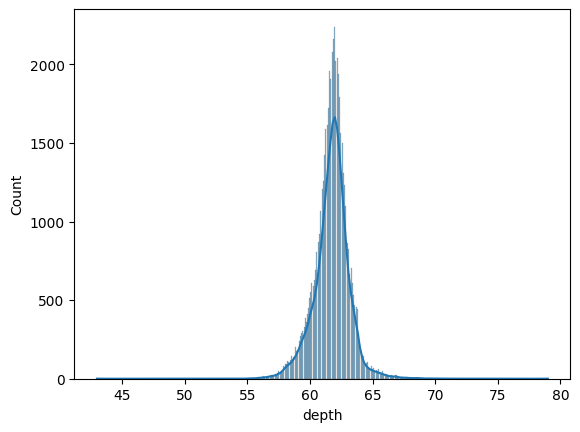

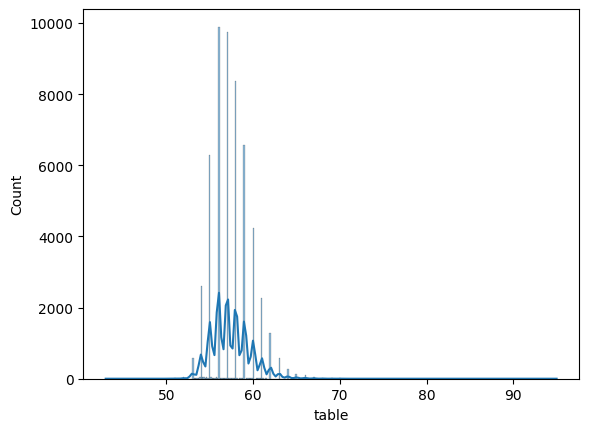

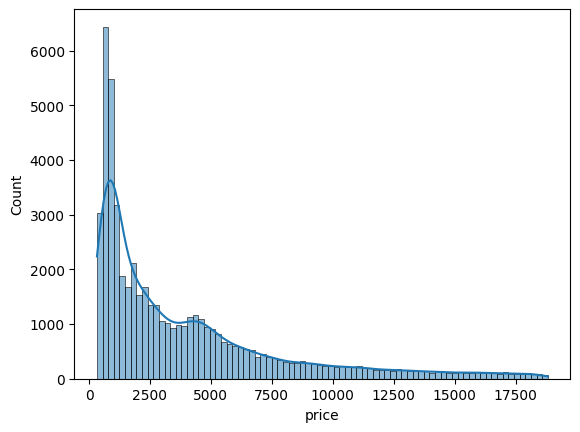

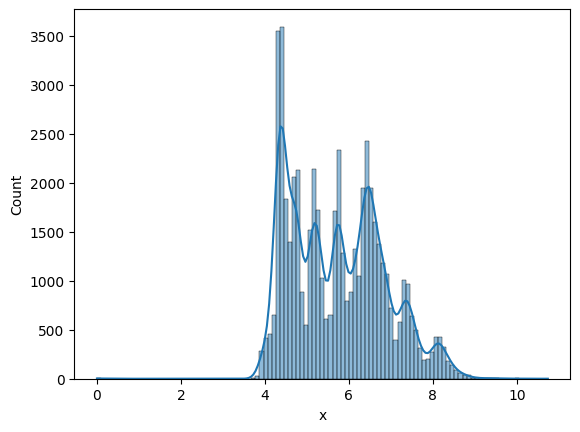

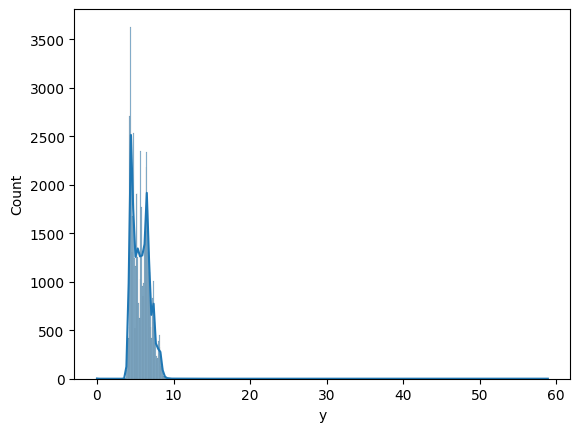

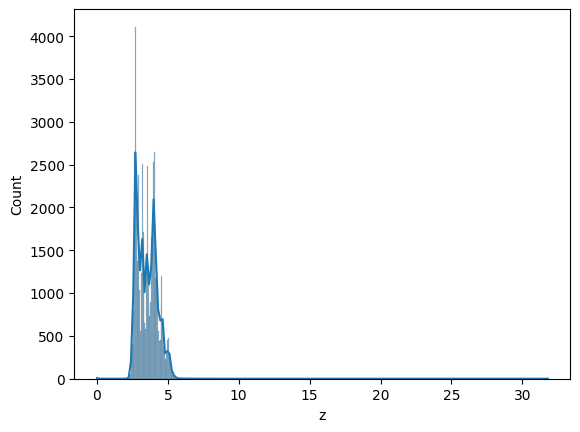

In [444]:
for col in numdf.columns:
    sns.histplot(df, x=col, kde=True)
    print()
    plt.show()

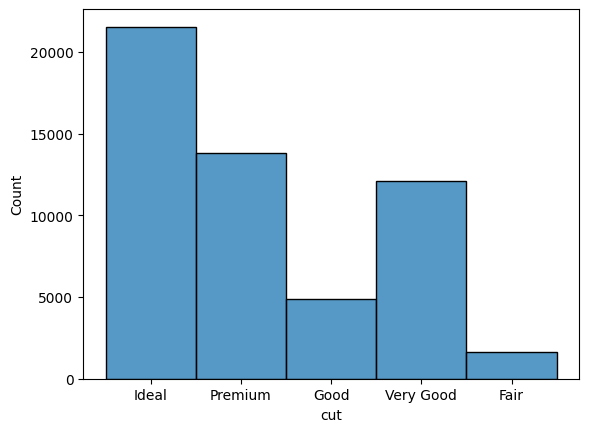

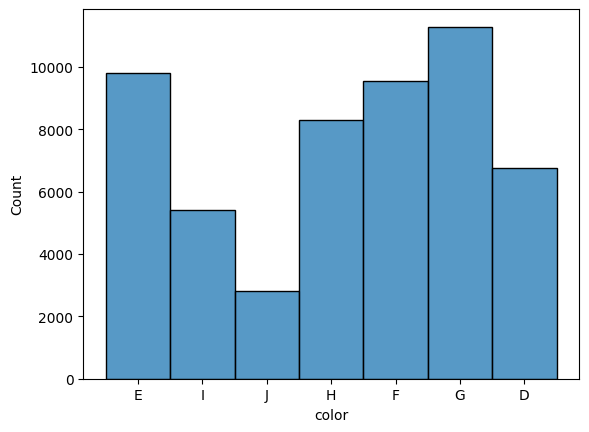

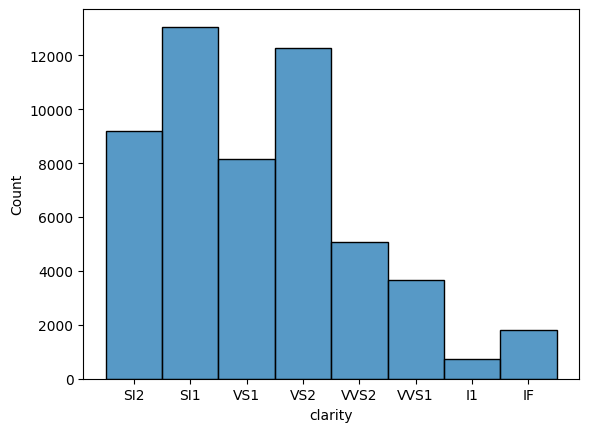

In [445]:
for col in catdf.columns:
    sns.histplot(df, x=col)
    print()
    plt.show()

In [446]:
numdf

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<Axes: >

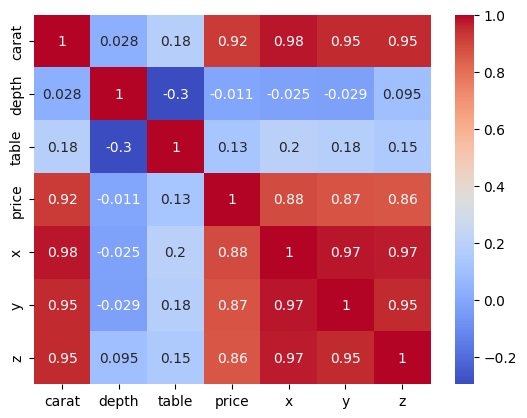

In [447]:
sns.heatmap(numdf.corr(), annot=True, cmap="coolwarm")

In [448]:
catdfcat=[['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
          ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
          ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder



In [450]:
catpipe=Pipeline(
    steps=[
        ('encode', OrdinalEncoder(categories=catdfcat)),
        ('scalar', StandardScaler())
    ]
)
numpipe=Pipeline(
    steps=[
        ('scalar', StandardScaler())
    ]
)

In [451]:
preprocessor=ColumnTransformer(
    transformers=[
        ('cat', catpipe, catdf.columns),
        ('num', numpipe, numdf.columns.difference(['price']))
    ]
)

In [452]:
from sklearn.model_selection import train_test_split

In [453]:
y=df['price']
df.drop('price', axis=1, inplace=True)
x=df

In [454]:
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=23)

In [456]:
xtrain=pd.DataFrame(preprocessor.fit_transform(xtrain))

ValueError: Found unknown categories ['Fair', 'Good', 'Very Good', 'Ideal', 'Premium'] in column 0 during fit